# Yennam Abhinaya Task-2

# TASK 2 - Prediction using Unsupervised ML

# Problem statement
To Predict the optimum number of clusters from the 'Iris' dataset and to represent it visually.

# Importing Required Libraries

In [3]:
# importing libraries    
import numpy as np    
import matplotlib.pyplot as plt   
import pandas as pd  

# Reading the Dataset

In [4]:
# Importing the dataset  
data = pd.read_csv('Iris.csv')  
data

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

# Understanding the Data

In [5]:
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [6]:
data.shape

(150, 6)

# Checking for Null values

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# checking for duplicate values 

In [8]:
data.duplicated().sum()

0

In [9]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

# Displaying the names of the columns

In [15]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [16]:
data.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
150  5.9            3.0           5.1            1.8           Iris-virginica     1
56   5.7            2.8           4.5            1.3           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
                                                                                 ..
100  5.7            2.8           4.1            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
1    5.1            3.5           1.4            0.2           Iris-setosa       

# Statistical summary

In [17]:
data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Dropping the 'Id ' column which is not a real feature

In [19]:
Iris = data.drop('Id' , axis=1)

# columns in dataset after dropping the feature which is not required

In [20]:
Iris

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

# Data Analysis

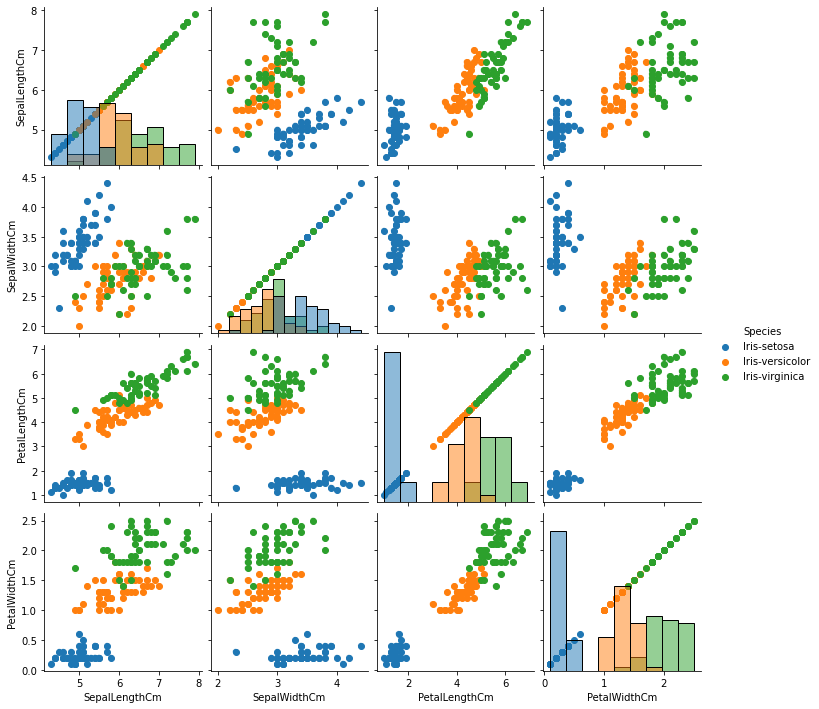

In [23]:
import seaborn as sns
b=sns.pairplot(Iris , hue = "Species", diag_kind="hist")
b.map(plt.scatter)

# Plotting Heat Map of Correlated Data

<AxesSubplot:>

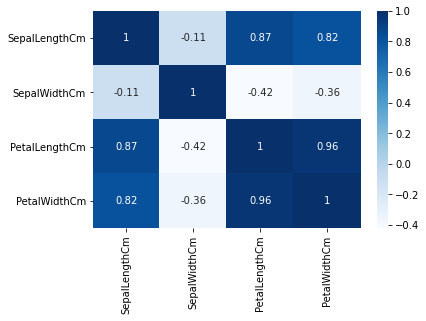

In [29]:
sns.heatmap(Iris.corr(), cmap = 'Blues', annot = True)

# Training and Testing Dataset

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = Iris.iloc[:, :-1].values
y= Iris.iloc[:, 4].values  

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Using K-Means Clustering Algorithm

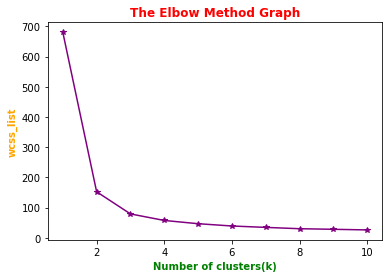

In [44]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list, marker = '*' , color = 'Purple')  
plt.title('The Elbow Method Graph',color='red',fontweight ='bold')  
plt.xlabel('Number of clusters(k)' , color='green' , fontweight ='bold')  
plt.ylabel('wcss_list' ,color='orange',fontweight ='bold')  
plt.show()  

# Training the K-means model on a dataset  

In [36]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 0, 2, 3, 0, 0, 3, 4, 3, 0, 3,
       0, 0, 0, 2, 0, 0, 0, 3, 3, 2, 0, 2, 3, 2, 0, 3, 2, 2, 0, 3, 3, 3,
       0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [49]:
Iris['Species'].value_counts() 

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

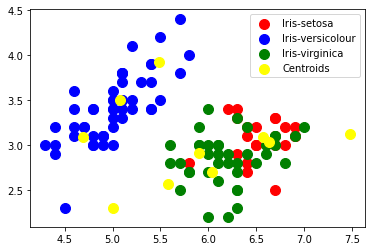

In [50]:
# # Visualising the clusters On the basis of 1st and 3rd columns, i.e. SepalLengthCm and PetalLengthCm
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Hence, we got optimum number of clusters of iris dataset is 3.